In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset into a DataFrame

data = pd.read_csv("600092_data.csv")
data.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


In [3]:
data.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


Running the describe function here shows there isn't many numeric columns in the dataset. What is interesting though is that the column Contra doesn't show up here, meaning that although it appears numeric in the dataframe above, it is actually an object, and needs to be converted.

In [4]:
#View the datatypes for each column of the dataframe
data.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
Random          1520 non-null float64
Id              1520 non-null int64
Indication      1517 non-null object
Diabetes        1518 non-null object
IHD             1520 non-null object
Hypertension    1517 non-null object
Arrhythmia      1520 non-null object
History         1518 non-null object
IPSI            1516 non-null float64
Contra          1520 non-null object
label           1517 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 130.7+ KB


## Performing Initial Exploratory Data Analysis

The first step is to clean the data of any missing values. It depends on the amount of missing values, if these are small, there is a chance these can remain in, otherwise they will be removed.

We are mostly interested in the column 'Label', as this is where our main classification will take place, so lets start by checking how many Risk and No Risk values we have within this column.

In [6]:
#Create a new dataframe that only contains the values within the column label, and then count them
data["label"].value_counts()

NoRisk     1008
Risk        507
Unknown       2
Name: label, dtype: int64

Here we can see there are 2 Unknown values, alongside risk and no risk results.

In [7]:
#Show only the values with an unknown label value
label = data[data["label"] == "Unknown"]
label

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,0.298074,173791,ASx,no,yes,yes,no,no,70.0,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95.0,100,Unknown


Lets replace those Unknown values with nan values that will be removed with any other null values

In [8]:
#Replace any values in the column label that equal Unknown into a NaN value
data["label"] = data["label"].replace("Unknown", np.nan)

In [9]:
#Check how many values exist
data.count()

Random          1520
Id              1520
Indication      1517
Diabetes        1518
IHD             1520
Hypertension    1517
Arrhythmia      1520
History         1518
IPSI            1516
Contra          1520
label           1515
dtype: int64

In [10]:
#Create a list that only includes the column data for Random and Id
del_col_list = ['Random', 'Id']

#Create a new dataframe without random and ID
clean_data = data.drop(del_col_list, axis=1)
clean_data.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk


In [11]:
#Convert all values of the Contra column to numeric values
#any blank values found will be converted to NaN

clean_data["Contra"] = pd.to_numeric(clean_data["Contra"], errors="coerce")

In [12]:
#Finding all values that contain null values
null_data = clean_data[clean_data.isnull().any(axis=1)]
null_data

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,CVA,yes,no,NaN,yes,no,95.0,90.0,Risk
337,CVA,no,yes,no,no,NaN,85.0,50.0,NoRisk
442,NaN,no,yes,yes,no,no,70.0,40.0,NoRisk
447,CVA,NaN,yes,yes,yes,no,90.0,100.0,Risk
453,ASx,no,no,yes,no,no,70.0,NaN,NoRisk
475,ASx,no,yes,yes,no,no,70.0,55.0,NaN
514,A-F,NaN,no,yes,no,no,80.0,40.0,NoRisk
523,CVA,no,no,yes,yes,no,95.0,100.0,NaN
590,A-F,no,no,NaN,no,no,78.0,30.0,NoRisk
620,A-F,no,no,no,no,no,NaN,100.0,Risk


It's important to first check how much of a percentage these records are before deciding if it is worthwhile to categorically fill them or simply remove them

In [13]:
#percentage of missing values in the dataset
null_data_percent = clean_data.isnull().sum() * 100 / len(clean_data)
null_data_percent

Indication      0.197368
Diabetes        0.131579
IHD             0.000000
Hypertension    0.197368
Arrhythmia      0.000000
History         0.131579
IPSI            0.263158
Contra          0.065789
label           0.328947
dtype: float64

This shows the percentage of values that are missing is fairly insignificant and will probably have no impact on the dataset, so they are safe to remove.

In [14]:
#Drop all data values that are null
clean_data = clean_data.dropna()
clean_data.isnull().sum()

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

The result shows there are no more null values present, and EDA can continue.

In [15]:
#Perform a new count to check how many values are present after removal
clean_data.count()

Indication      1500
Diabetes        1500
IHD             1500
Hypertension    1500
Arrhythmia      1500
History         1500
IPSI            1500
Contra          1500
label           1500
dtype: int64

In [16]:
clean_data.describe()

,IPSI,Contra
count,1500.000000,1500.000000
mean,78.828000,56.668000
std,10.159555,29.524977
min,35.000000,10.000000
25%,73.000000,30.000000
50%,77.000000,50.000000
75%,85.000000,85.000000
max,99.000000,100.000000


In [17]:
#Indication column has 4 expected values, lets check them
clean_data["Indication"].value_counts()

A-F    489
CVA    407
TIA    388
ASx    184
Asx     32
Name: Indication, dtype: int64

There are values present with ASx and Asx. Since the majority here are ASx, lets replace the other values so we are back to only 4 expected values, as per the Data Description document.

In [18]:
#Replace all values with Asx to ASx to match majority of values in the dataframe
clean_data["Indication"] = clean_data["Indication"].replace("Asx", "ASx")
clean_data["Indication"].value_counts()

A-F    489
CVA    407
TIA    388
ASx    216
Name: Indication, dtype: int64

In [19]:
#Run a check to make sure the label column only has risk and no risk
clean_data["label"].value_counts()

NoRisk    1000
Risk       500
Name: label, dtype: int64

As this point, the data has been cleaned.

In [20]:
#Create a dummy for the column label to better visualise risk vs no risk
clean_data_risk = pd.get_dummies(clean_data["label"])
#clean_data_indication = pd.get_dummies(clean_data["Indication"])

In [21]:
#Add the dummy variable we created to the end of our current table
clean_data = pd.concat([clean_data, clean_data_risk], axis=1)
#clean_data = pd.concat([clean_data, clean_data_indication],axis=1)
clean_data.head()

#Warning.. running this more than once will create duplicated dummy variables in the dataframe

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,NoRisk,Risk
0,A-F,no,no,yes,no,no,78.0,20.0,NoRisk,1,0
1,TIA,no,no,no,no,no,70.0,60.0,NoRisk,1,0
2,A-F,no,yes,yes,no,no,95.0,40.0,Risk,0,1
3,TIA,no,no,yes,no,no,90.0,85.0,Risk,0,1
4,CVA,no,no,no,no,no,70.0,20.0,NoRisk,1,0


This presents a small problem of duplication, for the time being a new table can be created which will not include the label column, but the original table will be kept

In [22]:
#Create a new variable for the label column
clean_data_label = ["label"]

#Create a new dataframe, and then drop the label column using the variable created above
clean_data_with_dummies = clean_data.drop(clean_data_label, axis=1)
clean_data_with_dummies.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,NoRisk,Risk
0,A-F,no,no,yes,no,no,78.0,20.0,1,0
1,TIA,no,no,no,no,no,70.0,60.0,1,0
2,A-F,no,yes,yes,no,no,95.0,40.0,0,1
3,TIA,no,no,yes,no,no,90.0,85.0,0,1
4,CVA,no,no,no,no,no,70.0,20.0,1,0


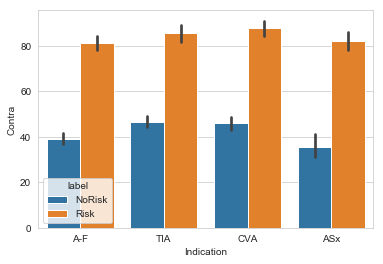

In [23]:
sns.set_style("whitegrid")
vis3 = sns.barplot(x="Indication", y ="Contra", hue="label", data=clean_data)

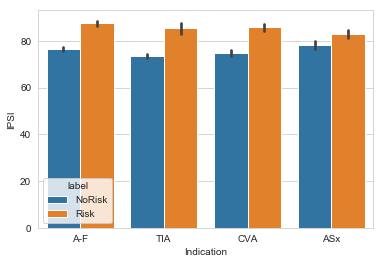

In [24]:
sns.set_style("whitegrid")
vis4 = sns.barplot(x="Indication", y ="IPSI", hue="label", data=clean_data)

In [25]:
clean_data_with_dummies.groupby(["Indication", "Risk", "NoRisk"]).count()

Diabetes  IHD  Hypertension  Arrhythmia  History  \
Indication Risk NoRisk                                                     
A-F        0    1            287  287           287         287      287   
           1    0            202  202           202         202      202   
ASx        0    1            112  112           112         112      112   
           1    0            104  104           104         104      104   
CVA        0    1            277  277           277         277      277   
           1    0            130  130           130         130      130   
TIA        0    1            324  324           324         324      324   
           1    0             64   64            64          64       64   

                        IPSI  Contra  
Indication Risk NoRisk                
A-F        0    1        287     287  
           1    0        202     202  
ASx        0    1        112     112  
           1    0        104     104  
CVA        0    1        277     277  
           1    0        130     130  
TIA        0    1        324     324  
           1    0         64      64

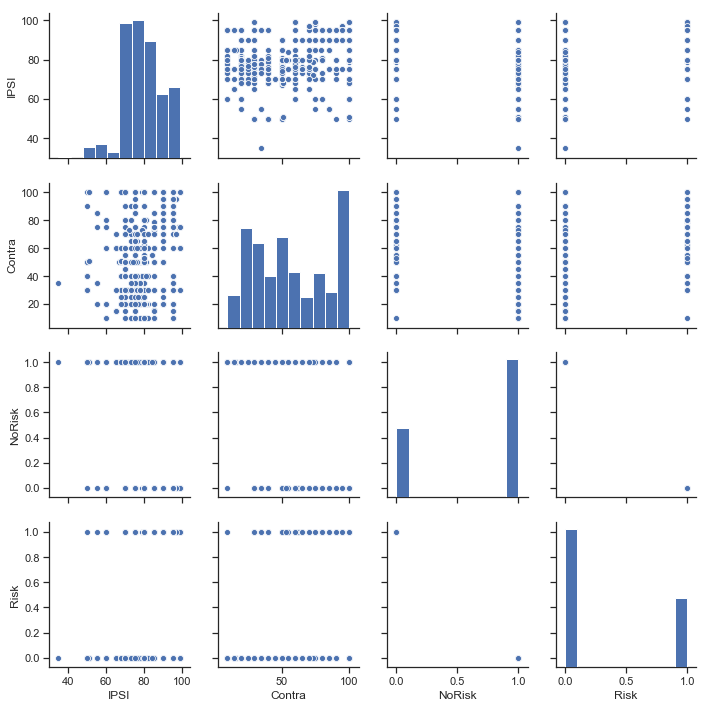

In [26]:
sns.set(style="ticks")
medical = clean_data_with_dummies
g = sns.pairplot(medical)

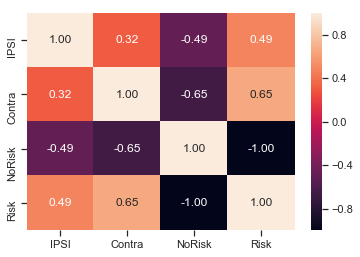

In [27]:
sns.heatmap(clean_data_with_dummies.corr(), annot=True, fmt=".2f")
plt.show()

In [28]:
#clean_data_with_dummies[clean_data_with_dummies["Indication"] == "TIA"]

In [32]:
dummies = pd.get_dummies(clean_data_with_dummies, columns= ["Diabetes", "IHD", "Hypertension",\
                                                            "Arrhythmia","History"])
dummies.head()

,Indication,IPSI,Contra,NoRisk,Risk,Diabetes_no,Diabetes_yes,IHD_no,IHD_yes,Hypertension_no,Hypertension_yes,Arrhythmia_no,Arrhythmia_yes,History_no,History_yes
0,A-F,78.0,20.0,1,0,1,0,1,0,0,1,1,0,1,0
1,TIA,70.0,60.0,1,0,1,0,1,0,1,0,1,0,1,0
2,A-F,95.0,40.0,0,1,1,0,0,1,0,1,1,0,1,0
3,TIA,90.0,85.0,0,1,1,0,1,0,0,1,1,0,1,0
4,CVA,70.0,20.0,1,0,1,0,1,0,1,0,1,0,1,0
